# <span style='color:#FE774C'>OBIS</span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analyses
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull data, and run visualizations using functions
### The second part uses a gui based approach

In [1]:
import odp.geospatial as odp
import warnings
import cmocean

warnings.filterwarnings("ignore")

In [2]:
db = odp.Database()
db_plt = odp.PlotTools()
gd = odp.GridData()

### Part 1: Using Functions

#### The following shows the available datasets that can be used as dataframes. To see gridded datasets, run *gd.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [3]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [4]:
df_db = db.datasets
df_db[["biodiversity" in x for x in df_db["tags"]]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'>You can also access citation information, homepage of database, etc,

In [5]:
db.datasets.loc["Ocean Biodiversity Information System"].citation

'OBIS (YEAR) Ocean Biodiversity Information System. Intergovernmental Oceanographic Commission of UNESCO. www.obis.org.'

In [6]:
db.datasets.loc["Ocean Biodiversity Information System"].homepage

'https://obis.org/'

## Pulling data - <span style='color:#FE774C'> **Ocean Biodiversity Information System** </span>


#### Insert the name of the table you are interested in into the query function
In this case we are interseted in the Ocean Biodiversity Information System<br>
This returns a [geopandas](https://geopandas.org/en/stable/docs.html) dataframe with a geometry column<br>
There are many built-in functions you can use with these geopandas dataframes

In [7]:
df = db.query(
    "Ocean Biodiversity Information System",
    date_from="2020-06-01",
    date_to="2020-07-01",
    limit=100,
)
df.head(3)

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,edcad067-f447-4208-8b40-d90a9103a252,-73.530437,45.5351,POINT (-73.53044 45.53510),2020-06-01,2020-06-01T22:05:57,22:05:57,NaN,2020,None,...,None,urn:lsid:marinespecies.org:taxname:137092,None,40990,['573654c1-4ce7-4ea2-b2f1-e4d42f8f9c31'],"[{""crossref"":{""citeinfo"":{""title"":""Happywhale ...",Happywhale.com,Luisa Longo,1764,None
1,0acbe804-a9bd-459c-92a6-31a38c7c60a5,1.676000,41.1998,POINT (1.67600 41.19980),2020-06-01,2020-06-01,None,NaN,2020,6,...,None,urn:lsid:marinespecies.org:taxname:107379,None,None,{4bf79a01-65a9-4db6-b37b-18434f26ddfc},None,None,None,https://marineinfo.org/id/dataset/6526,None
2,1203420b-f27a-40ca-b22f-006b2782e5e5,2.388800,39.5328,POINT (2.38880 39.53280),2020-06-01,2020-06-01,None,4.0,2020,6,...,None,urn:lsid:marinespecies.org:taxname:127129,None,None,{4bf79a01-65a9-4db6-b37b-18434f26ddfc},None,None,None,https://marineinfo.org/id/dataset/6526,None


#### There are 120 columns so let's only pull the ones we are interested in
We can pass this into the data_columns input

In [8]:
cols_of_interest = [
    "id",
    "geometry",
    "timestamp",
    "depth",
    "date_year",
    "month",
    "kingdom",
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "species",
    "scientificName",
]

In [9]:
df = db.query(
    "Ocean Biodiversity Information System", limit=100, data_columns=cols_of_interest
)
df.head(3)

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,c05dd802-efa0-49f1-b3ff-6a49360fbb06,POINT (-123.34710 48.13240),1998-02-11,NaN,1998.0,None,Animalia,Chordata,Aves,Anseriformes,Anatidae,Clangula,None,Clangula
1,12db6582-6241-4388-8897-d1ff2887c7c0,POINT (-124.72000 49.70700),2015-04-22,131.5,2015.0,4,Animalia,Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Euphausia,Euphausia pacifica,Euphausia pacifica
2,12ddc9a6-5970-4a91-a9c5-a98054ca4aa1,POINT (-124.27000 49.66900),2013-04-12,170.0,2013.0,4,Animalia,Arthropoda,Ostracoda,Halocyprida,Halocyprididae,Discoconchoecia,Discoconchoecia elegans,Discoconchoecia elegans


### Add <span style='color:#9D59F4'> **filters** </span> and <span style='color:#9D59F4'> **polygons** </span>to the data pull


#### In this case we are interseted in the OBIS dataset for a specific species, the Mackerel (Scomber scombrus)
#### Using the filter function, you can create filters for whichever column of the dataset you are interested in. 
#### You can also limit the search to a specific polygon

Let's define the filters:


In [10]:
## We only want entries where the species is Mackerel, Scomber scombrus
filter1 = db.filter_data("scientificName", "=", "Scomber scombrus")

## We only want data where the depth is less than 50 meter
filter2 = db.filter_data("depth", "<", "50")


##We want to limit the search to this specific polygon
poly = "POLYGON ((3.0 51.0, 20 51, 20 60, 3 60, 3 51))"

#### And now let's pass into our query function

In [25]:
df = db.query(
    "Ocean Biodiversity Information System",
    date_from="2010-06-01",
    date_to="2020-08-31",
    filters=[filter1, filter2],
    data_columns=cols_of_interest,
    poly=poly,
    limit=100,
)

In [26]:
df.head()

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,0ea8d45d-c57a-4db6-8c2f-40508e1f01ef,POINT (12.59660 55.77200),2012-10-17,2.30,2012,10,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
1,6cf5486c-0b15-403d-b04c-b899e76929dd,POINT (10.92730 56.40630),2012-07-19,2.00,2012,7,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
2,6f00dbd6-b95b-4dba-8aea-9ed9f07e0e7e,POINT (12.59660 55.77200),2012-10-17,2.50,2012,10,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
3,b371a4ed-5cf3-4ab0-b31f-16fa8d3a0b53,POINT (12.59660 55.77200),2012-10-17,2.40,2012,10,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
4,ee7647bd-ebad-4498-a253-9112dc728aea,POINT (12.59660 55.77200),2012-10-17,2.45,2012,10,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus


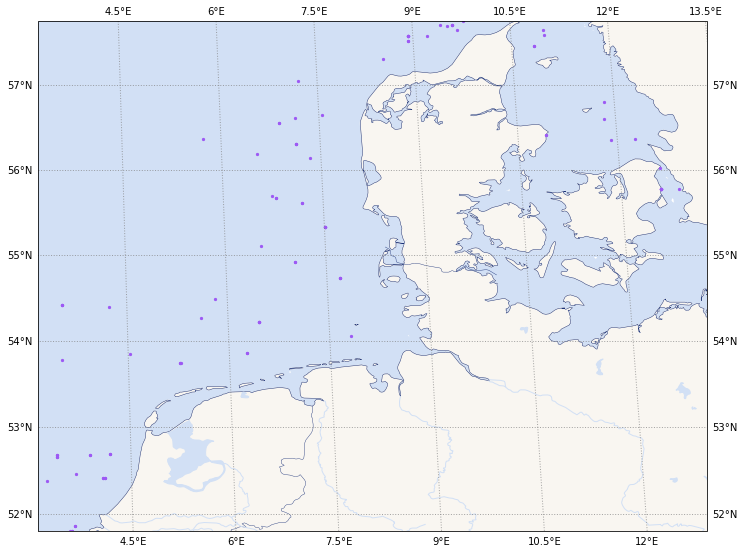

In [30]:
db_plt.plot_points(df)